In [1]:
# Gabriela Aguilar
# Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
# Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.


# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [21]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from getpass import getpass # For GitHub token request
import requests # Access to HTTP from GitHub repository
import base64
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster


In [3]:
# Accesso a repositorio de GitHub privado

token = getpass('Enter your GitHub Personal Access Token: ')

Enter your GitHub Personal Access Token: ··········


In [4]:
# Carga de los Datos

# Acceso a repo privado de GitHub y archivo de Datos raw via GitHub API
url = f"https://api.github.com/repos/gabrielaaguiv5/ProjectI/contents/data/raw/google_review_ratings.csv"

# Decodificación con GitHub API y token para acceso a repo privado
headers = {"Authorization": f"token {token}"}
res = requests.get(url, headers=headers)

# Decodificación de contenido en repo y carga en Database con Pandas
if res.status_code == 200:
    content = res.json()['content']
    decoded = base64.b64decode(content).decode('utf-8')
    datos = pd.read_csv(StringIO(decoded), delimiter=',')
    print(datos.head(10))
else:
    print(f"Failed to fetch file: {res.status_code} {res.reason}")

    userid  churches  resorts  beaches  parks  theatres  museums  malls  zoos  \
0   User 1       0.0      0.0     3.63   3.65       5.0     2.92   5.00  2.35   
1   User 2       0.0      0.0     3.63   3.65       5.0     2.92   5.00  2.64   
2   User 3       0.0      0.0     3.63   3.63       5.0     2.92   5.00  2.64   
3   User 4       0.0      0.5     3.63   3.63       5.0     2.92   5.00  2.35   
4   User 5       0.0      0.0     3.63   3.63       5.0     2.92   5.00  2.64   
5   User 6       0.0      0.0     3.63   3.63       5.0     2.92   5.00  2.63   
6   User 7       0.0      5.0     3.63   3.63       5.0     2.92   3.03  2.35   
7   User 8       0.0      5.0     3.63   3.63       5.0     2.92   5.00  2.63   
8   User 9       0.0      5.0     3.64   3.64       5.0     2.92   3.03  2.62   
9  User 10       0.0      5.0     3.64   3.64       5.0     2.92   5.00  2.35   

   restaurants  ...  art galleries dance clubs  swimming pools  gyms  \
0         2.33  ...           1.74  

# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [5]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

In [6]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


In [7]:
# Identificación de valores duplicados

print(datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [8]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
# Aplicando función para corregir datos según error code tras tratar de convertir a columnas_numericas

def limpiezaNull(x):
    try:
        # Reemplazando caractéres no numéricos (excepto por '.') por un espacio vacio
        return float(str(x).replace('\t', '').replace(' ',''))
    except ValueError:
        # En casos en que el retorno es Nan
        return np.nan

datos[columnas_numericas] = datos[columnas_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)


In [9]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [10]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Average ratings on churches',
    'resorts': 'Average ratings on resorts',
    'beaches': 'Average ratings on beaches',
    'parks': 'Average ratings on parks',
    'theatres': 'Average ratings on theatres',
    'museums': 'Average ratings on museums',
    'malls': 'Average ratings on malls',
    'zoos': 'Average ratings on zoo',
    'restaurants': 'Average ratings on restaurants',
    'pubs/bars': 'Average ratings on pubs/bars',
    'local services': 'Average ratings on local services',
    'burger/pizza shops': 'Average ratings on burger/pizza shops',
    'hotels/other lodgings': 'Average ratings on hotels/other lodgings',
    'juice bars': 'Average ratings on juice bars',
    'art galleries': 'Average ratings on art galleries',
    'dance clubs': 'Average ratings on dance clubs',
    'swimming pools': 'Average ratings on swimming pools',
    'gyms': 'Average ratings on gyms',
    'bakeries': 'Average ratings on bakeries',
    'beauty & spas': 'Average ratings on beauty & spas',
    'cafes': 'Average ratings on cafes',
    'view points': 'Average ratings on view points',
    'monuments': 'Average ratings on monuments',
    'gardens': 'Average ratings on gardens',
}, inplace=True)

In [11]:
# Revisión de datos actualizados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Unique user id                            5456 non-null   category
 1   Average ratings on churches               5456 non-null   float64 
 2   Average ratings on resorts                5456 non-null   float64 
 3   Average ratings on beaches                5456 non-null   float64 
 4   Average ratings on parks                  5456 non-null   float64 
 5   Average ratings on theatres               5456 non-null   float64 
 6   Average ratings on museums                5456 non-null   float64 
 7   Average ratings on malls                  5456 non-null   float64 
 8   Average ratings on zoo                    5456 non-null   float64 
 9   Average ratings on restaurants            5456 non-null   float64 
 10  Average ratings on pubs/

In [12]:
# 3. Basic Info
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = ['Average ratings on churches', 'Average ratings on resorts', 'Average ratings on beaches', 'Average ratings on parks', 'Average ratings on theatres', 'Average ratings on museums',
    'Average ratings on malls', 'Average ratings on zoo', 'Average ratings on restaurants', 'Average ratings on pubs/bars', 'Average ratings on local services', 'Average ratings on burger/pizza shops',
    'Average ratings on hotels/other lodgings', 'Average ratings on juice bars', 'Average ratings on art galleries', 'Average ratings on dance clubs', 'Average ratings on swimming pools',
    'Average ratings on gyms', 'Average ratings on bakeries', 'Average ratings on beauty & spas', 'Average ratings on cafes', 'Average ratings on view points', 'Average ratings on monuments', 'Average ratings on gardens']

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir resultados
print("Varianza:")
print(varianza)
print("\nDesviación estándar:")
print(desvest)
print("\nCoeficiente de variación:")
print(CV)
print("\nRango:")
print(Rango)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

# Define headers

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Varianza:
Average ratings on churches                 0.684929
Average ratings on resorts                  2.020485
Average ratings on beaches                  1.557043
Average ratings on parks                    1.713896
Average ratings on theatres                 1.793072
Average ratings on museums                  1.644551
Average ratings on malls                    1.997961
Average ratings on zoo                      1.235190
Average ratings on restaurants              1.840912
Average ratings on pubs/bars                1.709987
Average ratings on local services           1.910128
Average ratings on burger/pizza shops       1.561027
Average ratings on hotels/other lodgings    1.978360
Average ratings on juice bars               2.485939
Average ratings on art galleries            2.944521
Average ratings on dance clubs              1.225459
Average ratings on swimming pools           0.947772
Average ratings on gyms                     0.898536
Average ratings on bakeries         

In [15]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir resultados
print("Asimetría:")
print(asimetria)
print("\nCurtosis:")
print(curtosis)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

# Define headers
headers = ["Variable", "Asimetría", "Curtosis"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Asimetría:
Average ratings on churches                 1.666583
Average ratings on resorts                  0.883645
Average ratings on beaches                  1.084852
Average ratings on parks                    0.706732
Average ratings on theatres                 0.487032
Average ratings on museums                  0.558141
Average ratings on malls                    0.017513
Average ratings on zoo                      0.772869
Average ratings on restaurants              0.273517
Average ratings on pubs/bars                0.523535
Average ratings on local services           0.815698
Average ratings on burger/pizza shops       1.387466
Average ratings on hotels/other lodgings    1.264193
Average ratings on juice bars               1.033586
Average ratings on art galleries            0.863785
Average ratings on dance clubs              2.694087
Average ratings on swimming pools           3.266494
Average ratings on gyms                     3.283489
Average ratings on bakeries        

In [16]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir resultados

print("Q1:")
print(Q1)
print("\nQ2:")
print(Q2)
print("\nQ3:")
print(Q3)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

# Define headers

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

# Print table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Q1:
Average ratings on churches                 0.92
Average ratings on resorts                  1.36
Average ratings on beaches                  1.54
Average ratings on parks                    1.73
Average ratings on theatres                 1.77
Average ratings on museums                  1.79
Average ratings on malls                    1.93
Average ratings on zoo                      1.62
Average ratings on restaurants              1.80
Average ratings on pubs/bars                1.64
Average ratings on local services           1.58
Average ratings on burger/pizza shops       1.29
Average ratings on hotels/other lodgings    1.19
Average ratings on juice bars               1.03
Average ratings on art galleries            0.86
Average ratings on dance clubs              0.69
Average ratings on swimming pools           0.58
Average ratings on gyms                     0.53
Average ratings on bakeries                 0.52
Average ratings on beauty & spas            0.54
Average ratings 

In [17]:
# Descripción consolidada de las variables numéricas
CNum.describe()

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
# Agregar ciudades al random

city_list = ['London', 'Paris', 'Rome', 'Berlin', 'Barcelona', 'Amsterdam', 'Vienna', 'Prague', 'Madrid', 'Lisbon']
datos['City'] = [random.choice(city_list) for _ in range(len(datos))]


In [28]:
# Normalizando datos

X = datos.drop(['Unique user id', 'City'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled


array([[-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33176275],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33176275],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33176275],
       ...,
       [-0.6232054 ,  1.88579429,  1.23480615, ...,  2.03270857,
         2.63413607, -0.38444726],
       [-0.61112123,  1.21739557,  1.25083563, ...,  2.03270857,
         2.63413607, -0.37591289],
       [-0.61112123,  1.23146712,  2.01223593, ...,  2.03270857,
         2.63413607, -0.33324102]])

In [33]:
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
datos['Cluster'] = kmeans.fit_predict(X_scaled)

datos['Cluster']

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
5451,4
5452,4
5453,4
5454,4


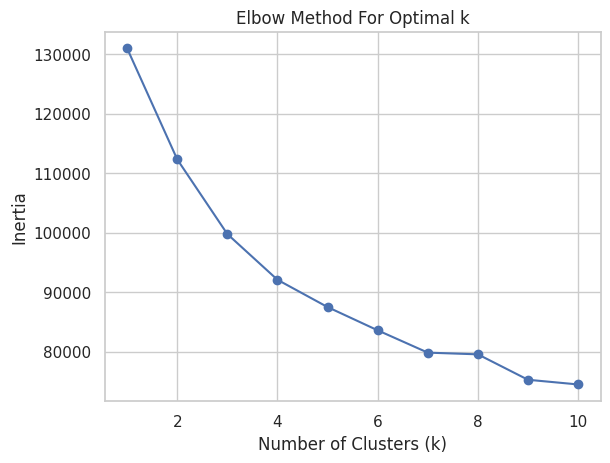

In [34]:
import matplotlib.pyplot as plt
inertias = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()